Importamos las librerias

In [514]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)

data = pd.read_csv('/content/drive/MyDrive/Python_D_A/Master Inteligencia Artificial/Tema 1. Python Bascis/ML/glass.csv')

Visualizacion de outliers con boxplot

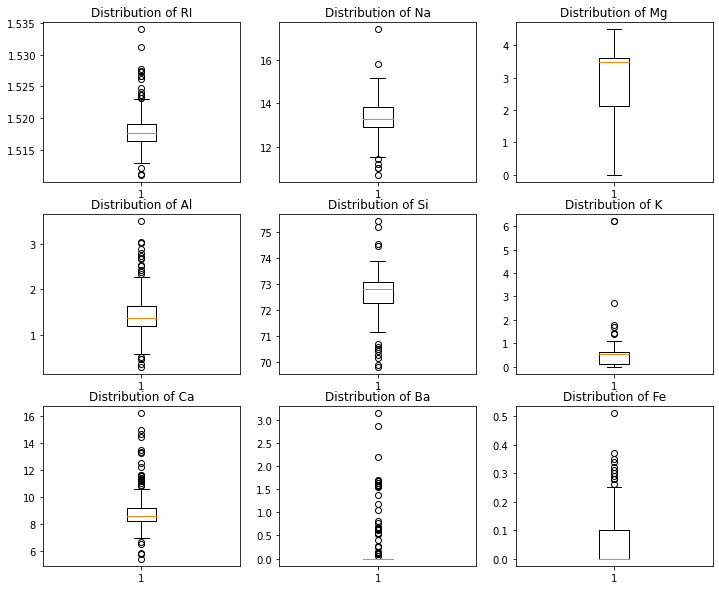

In [515]:
## Checking each column for outliers
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)


ax1.boxplot(data['RI'])
ax1.set_title('Distribution of RI')


ax2.boxplot(data['Na'])
ax2.set_title('Distribution of Na')


ax3.boxplot(data['Mg'])
ax3.set_title('Distribution of Mg')



ax4.boxplot(data['Al'])
ax4.set_title('Distribution of Al')



ax5.boxplot(data['Si'])
ax5.set_title('Distribution of Si')



ax6.boxplot(data['K'])
ax6.set_title('Distribution of K')

ax7.boxplot(data['Ca'])
ax7.set_title('Distribution of Ca')



ax8.boxplot(data['Ba'])
ax8.set_title('Distribution of Ba')


# Boxplot for Fe
ax9.boxplot(data['Fe'])
ax9.set_title('Distribution of Fe');

Excluimos los outliers

In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [517]:
caracteristicas = data.columns[:-1].tolist()
print(df.shape)

(214, 10)


In [518]:
def outlier_hunt(data):
    outliers = []
    for col in df.columns.tolist():
      Q1 = np.percentile(data[col], 25)   
      Q3 = np.percentile(data[col],75)   
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
          
      outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
      outliers.extend(outlier_list_col)
      outliers = Counter(outliers)        
      multiple_outliers = list( k for k, v in outliers.items() if v > 2 )
    
      return multiple_outliers   

In [519]:
from collections import Counter
outliers = outlier_hunt(data[caracteristicas])
df = data.drop(outliers).reset_index(drop=True)

In [520]:
print(df.shape)

(214, 10)


Split train & test con stratefy

In [521]:
X = data.iloc[:,:-1]
y = data['Type']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,stratify=y)

Normalizacion de los datasets

In [522]:
x_train_norm = (x_train-np.mean(x_train, 0))/np.std(x_train)
x_test_norm = (x_test-np.mean(x_train, 0))/np.std(x_train)

y_train_norm = (y_train-np.mean(y_train, 0))/np.std(y_train)
y_test_norm = (y_test-np.mean(y_train, 0))/np.std(y_train)

Modelos


In [523]:
# XGBoost CLassifier
xgbMod = xgboost.XGBClassifier(max_depth = 1, n_estimators = 80, learning_rate = 0.05, random_state = 1)
xgbMod.fit(x_train,y_train)
y_pred = xgbMod.predict(x_test)
y_pred2 = xgbMod.predict(x_train)
sc1 = metrics.balanced_accuracy_score(y_pred,y_test)
ssc1= metrics.balanced_accuracy_score(y_pred2,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [524]:
# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth =1, n_estimators = 80, learning_rate = 0.05, random_state = 1)
gbmMod.fit(x_train,y_train)
y_pred = gbmMod.predict(x_test)
y_pred2 = gbmMod.predict(x_train)
sc2 = metrics.balanced_accuracy_score(y_pred,y_test)
ssc2= metrics.balanced_accuracy_score(y_pred2,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [525]:
# Decision Tree
DecisionTree = DecisionTreeClassifier(max_depth =3)
DecisionTree.fit(x_train, y_train)
y_pred = DecisionTree.predict(x_test)
y_pred2 = DecisionTree.predict(x_train)
sc3 = metrics.balanced_accuracy_score(y_pred,y_test)
ssc3= metrics.balanced_accuracy_score(y_pred2,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [526]:
# Random Forest
RandomForest = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandomForest.fit(x_train, y_train)
y_pred = RandomForest.predict(x_test)
y_pred2 = RandomForest.predict(x_train)
sc4 = metrics.balanced_accuracy_score(y_pred,y_test)
ssc4= metrics.balanced_accuracy_score(y_pred2,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [527]:
# Compare accuracy of models
pd.DataFrame([['XG Boost',sc1, ssc1],['Gradient Boost',sc2, ssc2],
                             ['Decision Tree',sc3,ssc3],['Random Forest',sc4,ssc4]],
                                 columns=['Model','Accuracy Test', 'Accuracy Train'])

,Model,Accuracy Test,Accuracy Train
0,XG Boost,0.651634,0.827104
1,Gradient Boost,0.851634,0.878209
2,Decision Tree,0.646825,0.754515
3,Random Forest,0.826299,0.866625


Para el analisis de cada modelo, hemos utilizado gridsearch para ajustar los hyperparametros. Un ejemplo es el de XGBOOST

In [528]:
# GridSearch

In [513]:
import xgboost
xgb=xgboost.XGBClassifier()

parameters ={'nthreads':[1,2,3,4,5],
             'objetive':['multi:softprob'],
             'learning_rate':[0.1,0.15,0.2],
             'n_estimators':[90],
             'max_depth':[3,2,1]}
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(estimator=xgb,param_grid=parameters,cv=4,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_estimator_)
print(clf.best_score_)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, nthreads=1, objective='multi:softprob',
              objetive='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
0.7548449612403101


Despues de ejecutar los distintos, el mejor modelo es el de Gradient Boost. Aunque existe algo de sobreajuste.